看起来，除了Sigmoid核函数，其他核函数效果都还不错。但其实rbf和poly都有自己的弊端，我们使用乳腺癌数据集作为例子来展示一下：

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
# 时间戳转换成真实的时间
import datetime

In [3]:
data=load_breast_cancer()

In [4]:
X=data.data

In [5]:
X.shape

(569, 30)

In [6]:
y=data.target

In [7]:
np.unique(y)

array([0, 1])

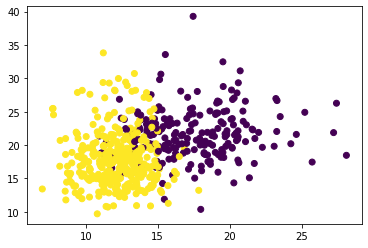

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [9]:
# PCA方法降低维度
from sklearn.decomposition import PCA
X_dr=PCA(2).fit_transform(X)
X_dr.shape

(569, 2)

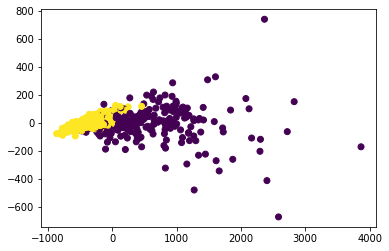

In [10]:
# 样本不均衡 
plt.scatter(X_dr[:,0],X_dr[:,1],c=y)
plt.show()

In [11]:
#切分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest =train_test_split(X,y,test_size=0.3,random_state=420)

In [12]:
Kernel = ["linear","poly","rbf","sigmoid"]

In [ ]:
# 运行时间太长  慎用  ！！！ 微秒

for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
    , gamma="auto"
#      degree=1
#   内存大小
    ,cache_size=5000
    ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" %(kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:791901


然后我们发现，怎么跑都跑不出来。模型一直停留在线性核函数之后，就没有再打印结果了。这证明，多项式核函数此时此刻要消耗大量的时间，运算非常的缓慢。在循环中去掉多项式核函数，再试试看能否跑出结果:

In [14]:
time()

1612927849.0284646

In [16]:
datetime.datetime.fromtimestamp(time()).strftime("%Y-%m-%d %M:%S:%f")

'2021-02-10 32:11:939646'

In [15]:
Kernel = ["linear","rbf","sigmoid"]

for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
    , gamma="auto"
#      degree=1
#   内存大小
    ,cache_size=5000
    ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" %(kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:733990
The accuracy under kernel rbf is 0.596491
00:00:053036
The accuracy under kernel sigmoid is 0.596491
00:00:008005


我们可以有两个发现。首先，乳腺癌数据集是一个线性数据集，线性核函数跑出来的效果很好。rbf和sigmoid两个擅长非线性的数据从效果上来看完全不可用。其次，线性核函数的运行速度远远不如非线性的两个核函数。
如果数据是线性的，那如果我们把degree参数调整为1，多项式核函数应该也可以得到不错的结果：

In [19]:
Kernel = ["linear","poly","rbf","sigmoid"]

for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
    , gamma="auto"
    , degree=1
    ,cache_size=5000
    ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" %(kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:724983
The accuracy under kernel poly is 0.923977
00:00:169966
The accuracy under kernel rbf is 0.596491
00:00:059663
The accuracy under kernel sigmoid is 0.596491
00:00:007006


多项式核函数的运行速度立刻加快了，并且精度也提升到了接近线性核函数的水平，可喜可贺。但是，之前的实验中，我们了解到，rbf在线性数据上也可以表现得非常好，那在这里，为什么跑出来的结果如此糟糕呢？
其实，这里真正的问题是数据的量纲问题。回忆一下我们如何求解决策边界，如何判断点是否在决策边界的一边？是靠计算”距离“，虽然我们不能说SVM是完全的距离类模型，但是它严重受到数据量纲的影响。让我们来探索一下乳腺癌数据集的量纲：

In [21]:
#查看数据量纲 偏态问题
import pandas as pd
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,19.530000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,24.992000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,129.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1177.400000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.114820,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.175460,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.203040,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.100420,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.214940,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.072266,0.085438,0.09744


一眼望去，果然数据存在严重的量纲不一的问题。我们来使用数据预处理中的标准化的类，对数据进行标准化：

In [22]:
#数据标准化消除量纲不统一问题
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.162867e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.530609e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-7.078891e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.799835e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.132177e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.120369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-4.421380e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,9.732500e-16,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.971670e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.453631e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [23]:
#切分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest =train_test_split(X,y,test_size=0.3,random_state=420)

for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
    , gamma="auto"
    , degree=1
    ,cache_size=5000
    ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" %(kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.976608
00:00:011690
The accuracy under kernel poly is 0.964912
00:00:005002
The accuracy under kernel rbf is 0.970760
00:00:011007
The accuracy under kernel sigmoid is 0.953216
00:00:006006


量纲统一之后，可以观察到，所有核函数的运算时间都大大地减少了，尤其是对于线性核来说，而多项式核函数居然变成了计算最快的。其次，rbf表现出了非常优秀的结果。经过我们的探索，我们可以得到的结论是：
1. 线性核，尤其是多项式核函数在高次项时计算非常缓慢
2. rbf和多项式核函数都不擅长处理量纲不统一的数据集
　幸运的是，这两个缺点都可以由数据无量纲化来解决。因此，SVM执行之前，非常推荐先进行数据的无量纲化！到了这一步，我们是否已经完成建模了呢？虽然线性核函数的效果是最好的，但它是没有核函数相关参数可以调整的，rbf和多项式却还有着可以调整的相关参数，接下来我们就来看看这些参数。

2、选取与核函数相关的参数：degree & gamma & coef0

参数        含义
degree      整数，可不填，默认3，多项式核函数的次数（'poly'），如果核函数没有选择"poly"，这个参数会被忽略

gamma      浮点数，可不填，默认“auto"，核函数的系数，仅在参数Kernel的选项为”rbf","poly"和"sigmoid”的时候有效输入“auto"，自动使用1/(n_features)作为gamma的取值，输入"scale"，则使用1/(n_features * X.std())作为gamma的取值，输入"auto_deprecated"，则表示没有传递明确的gamma值（不推荐使用）

coef0      浮点数，可不填，默认=0.0，核函数中的常数项，它只在参数kernel为'poly'和'sigmoid'的时候有效。

In [33]:
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字

In [34]:
gamma_range

array([1.00000000e-10, 1.67683294e-10, 2.81176870e-10, 4.71486636e-10,
       7.90604321e-10, 1.32571137e-09, 2.22299648e-09, 3.72759372e-09,
       6.25055193e-09, 1.04811313e-08, 1.75751062e-08, 2.94705170e-08,
       4.94171336e-08, 8.28642773e-08, 1.38949549e-07, 2.32995181e-07,
       3.90693994e-07, 6.55128557e-07, 1.09854114e-06, 1.84206997e-06,
       3.08884360e-06, 5.17947468e-06, 8.68511374e-06, 1.45634848e-05,
       2.44205309e-05, 4.09491506e-05, 6.86648845e-05, 1.15139540e-04,
       1.93069773e-04, 3.23745754e-04, 5.42867544e-04, 9.10298178e-04,
       1.52641797e-03, 2.55954792e-03, 4.29193426e-03, 7.19685673e-03,
       1.20679264e-02, 2.02358965e-02, 3.39322177e-02, 5.68986603e-02,
       9.54095476e-02, 1.59985872e-01, 2.68269580e-01, 4.49843267e-01,
       7.54312006e-01, 1.26485522e+00, 2.12095089e+00, 3.55648031e+00,
       5.96362332e+00, 1.00000000e+01])

但从核函数的公式来看，我们其实很难去界定具体每个参数如何影响了SVM的表现。当gamma的符号变化，或者degree的大小变化时，核函数本身甚至都不是永远单调的。所以如果我们想要彻底地理解这三个参数，我们要先推导出它们如何影响核函数地变化，再找出核函数的变化如何影响了我们的预测函数（可能改变我们的核变化所在的维度），再判断出决策边界随着预测函数的改变发生了怎样的变化。无论是从数学的角度来说还是从实践的角度来  说，这个过程太复杂也太低效。所以，我们往往避免去真正探究这些参数如何影响了我们的核函数，而直接使用学  习曲线或者网格搜索来帮助我们查找最佳的参数组合。

　　对于高斯径向基核函数，调整gamma的方式其实比较容易，那就是画学习曲线。我们来试试看高斯径向基核函数

　　rbf的参数gamma在乳腺癌数据集上的表现：

0.9766081871345029 0.012067926406393264


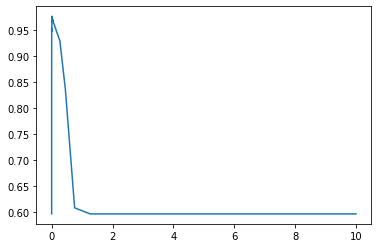

In [35]:
score = []

for i in gamma_range:
    clf = SVC(kernel="rbf",gamma = i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))

print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()


通过学习曲线，很容就找出了rbf的最佳gamma值。但我们观察到，这其实与线性核函数的准确率一模一样之前的准确率。我们可以多次调整gamma_range来观察结果，可以发现97.6608应该是rbf核函数的极限了。

但对于多项式核函数来说，一切就没有那么容易了，因为三个参数共同作用在一个数学公式上影响它的效果，因此  我们往往使用网格搜索来共同调整三个对多项式核函数有影响的参数。依然使用乳腺癌数据集。

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [38]:
t0=time()
gamma_range = np.logspace(-10,1,50)
coef0_range = np.linspace(0,5,10)
param_grid = dict(gamma = gamma_range ,coef0 = coef0_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=420)
grid = GridSearchCV(SVC(kernel = "poly",degree=1,cache_size=5000)
                    , param_grid=param_grid
                    , cv=cv)
grid.fit(X, y)
print("The best parameters are %s with a score of %0.5f" % (grid.best_params_, grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The best parameters are {'coef0': 0.0, 'gamma': 0.09540954763499924} with a score of 0.96959
57:31:196138


可以发现，网格搜索为我们返回了参数coef0=0，gamma=0.18329807108324375，但整体的分数是0.96959，虽然比调参前略有提高，但依然没有超过线性核函数核rbf的结果。可见，如果最初选择核函数的时候，你就发现多项式的结果不如rbf和线性核函数，那就不要挣扎了，试试看调整rbf或者直接使用线性。

软间隔与重要参数C

　　当然，不是所有数据都是完全线性可分的。可能存在着一条直线能够将大部分数据点的类别划分正确，但无论如何也无法将全部的点分对，如同下图所展示的图，存在着混杂在红色类中的紫色点，这种情况下没有一条直线能够将两类数据完全分类正确。

　　关键概念：硬间隔与软间隔

　　当两组数据是完全线性可分，我们可以找出一个决策边界使得训练集上的分类误差为0，这两种数据就被称为是存在“硬间隔”的。当两组数据几乎是完全线性可分的，但决策边界在训练集上存在较小的训练误差，这两种数据就被称为是存在“软间隔”。



这个时候，我们的决策边界就不是单纯地寻求最大边际了，因为对于软间隔地数据来说，边际越大被分错的样本也  就会越多，因此我们需要找出一个“最大边际”与“被分错的样本数量”之间的平衡。参数C用于权衡“训练样本的正确分类”与“决策函数的边际最大化”两个不可同时完成的目标，希望找出一个平衡点来让模型的效果最佳。

松弛系数C ；用于衡量将训练集样本的正确分类与决策函数的边际最大化的效力。
浮点数，默认1，必须大于等于0，可不填

松弛系数的惩罚项系数。如果C值设定比较大，那SVC可能会选择边际较小的，能够更好地分类所有训练点的决策边界，不过模型的训练时间也会更长。如果C的设定值较高，那SVC会尽量最大化边界，决策功能会更简单，但代价是训练的准确度。换句话说，C在SVM中的影响就像正则化参数对逻辑回归的影响。

　在实际使用中，C和核函数的相关参数（gamma，degree等等）们搭配，往往是SVM调参的重点。与gamma不同，C没有在对偶函数中出现，并且是明确了调参目标的，所以我们可以明确我们究竟是否需要训练集上的高精确度来调整C的方向。默认情况下C为1，通常来说这都是一个合理的参数。如果我们的数据很嘈杂，那我们往往减小C。当然，我们也可以使用网格搜索或者学习曲线来调整C的值。

0.9766081871345029 0.2136734693877551


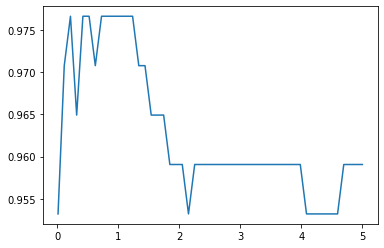

In [42]:
#调线性核函数 极限0.9766
score = []
C_range = np.linspace(0.01,5,50)
for i in C_range:
    clf = SVC(kernel="linear",C=i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))     
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9883040935672515 25.103673469387758


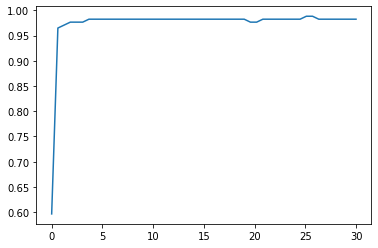

In [44]:
#rbf
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))     
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9883040935672515 24.984984984984983


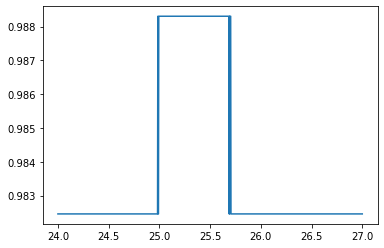

In [47]:
#进一步细化
score = []
C_range = np.linspace(24,27,1000)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))     
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

此时，我们找到了乳腺癌数据集上的最优解：rbf核函数下的98.83%的准确率。当然，我们还可以使用交叉验证来改进我们的模型，获得不同测试集和训练集上的交叉验证结果。但上述过程，为大家展现了如何选择正确的核函数，以及如何调整核函数的参数。

SVM第一周总结：2.4总结
本周，我们讲解了支持向量机的原理，向大家介绍了支持向量机的损失函数，拉格朗日函数，拉格朗日对偶函数，预测函数以及这些函数在非线性，软间隔这些情况上的推广。我们介绍了四种核函数，包括它们的特点，适合什么样的数据，有什么相关参数，优缺点，以及什么时候使用。最后我们还讲解了核函数在相关参数上的调参。本节课的内容非常多，但我们对SVM的探索还远远没有结束。下一周我们会继续讲解SVM，包括SVC的模型评价指标，SVC使用中的其他重要参数，重要属性和接口，以及其他重要问题，当然还有案例。希望大家尽力消化这一周的内容，SVC的探索道路依然任重而道远。